In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
#fazendo o download dos dados direto dos datasets presente na scikit-learn
data = datasets.load_breast_cancer()
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
#variável meta (target) -> aquilos que estamos tentando prever
#no caso: cancer benigno ou maligno
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
#linhas x colunas
data.data.shape

(569, 30)

In [5]:
#visualizando as 5 primeiras amostras
data.data[0:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

## TODO 1
> Separe o dataset em conjunto de treino e teste, sendo 70% para treino e 30% para teste

In [12]:
#resposta
X = data.data;
y = data.target;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## TODO 2
> Treine uma Árvore de Decisão. Teste com diferentes valores de max_depth e compare os resultados

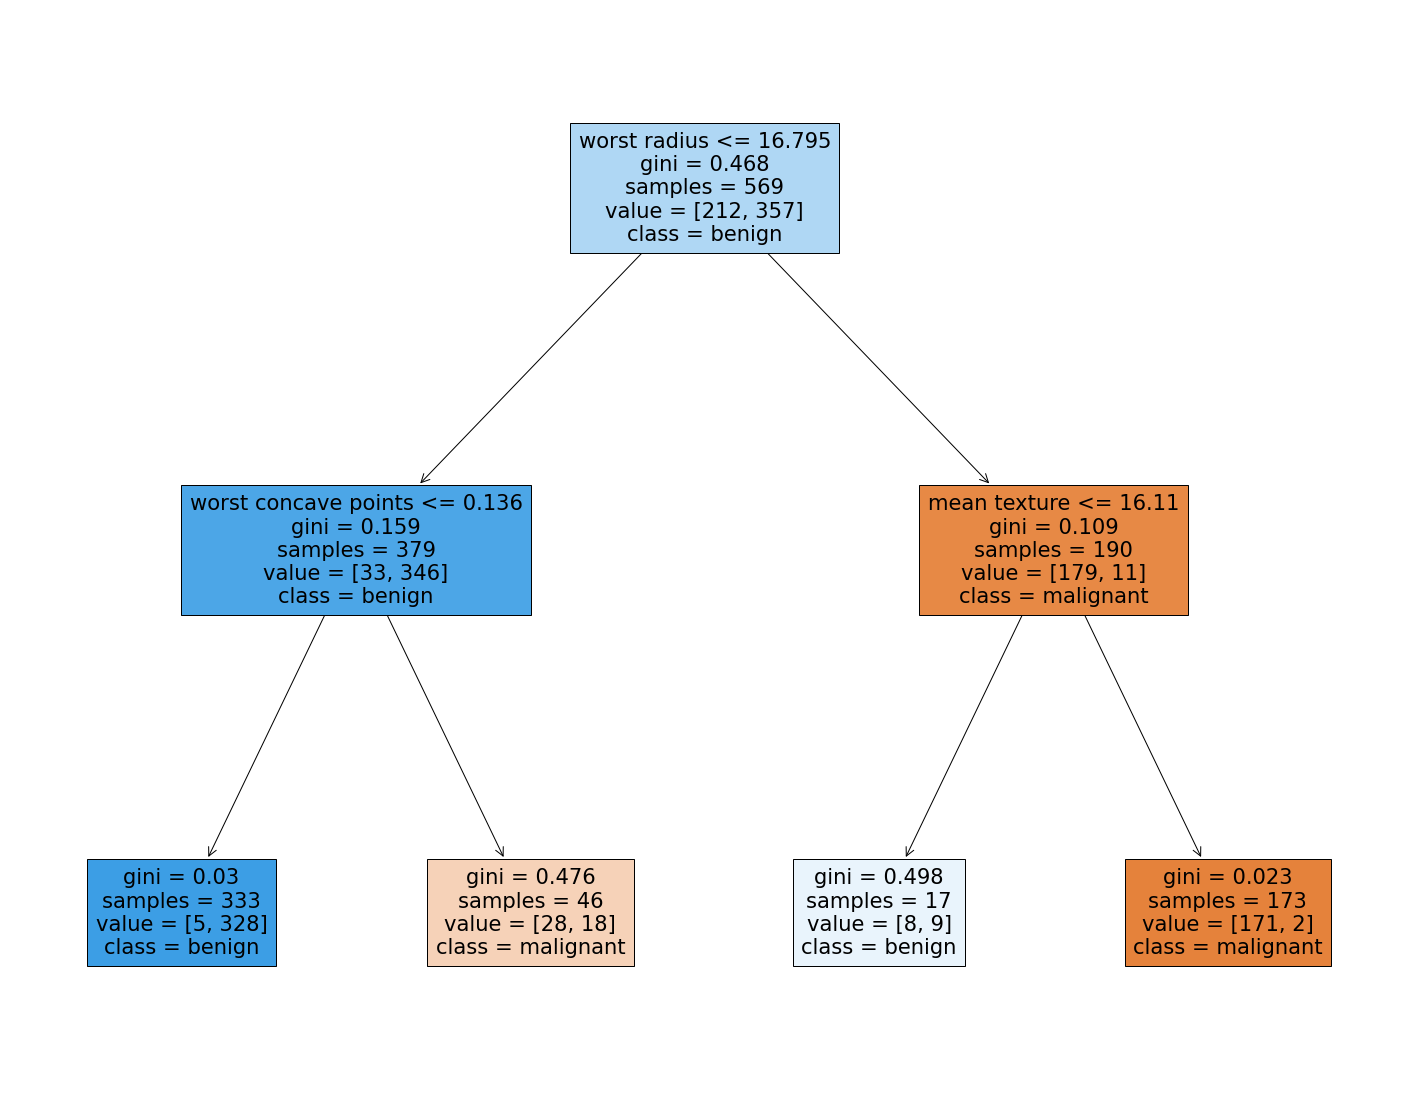

In [16]:
#resposta
from matplotlib import pyplot as plt
from sklearn import tree

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
model = tree_clf.fit(X_train, y_train)

fig = plt.figure(figsize=(25,20))
_   = tree.plot_tree(tree_clf, 
                   feature_names=data.feature_names,  
                   class_names=data.target_names,
                   filled=True)

## TODO 3
> Faça a predição para o conjunto de teste 

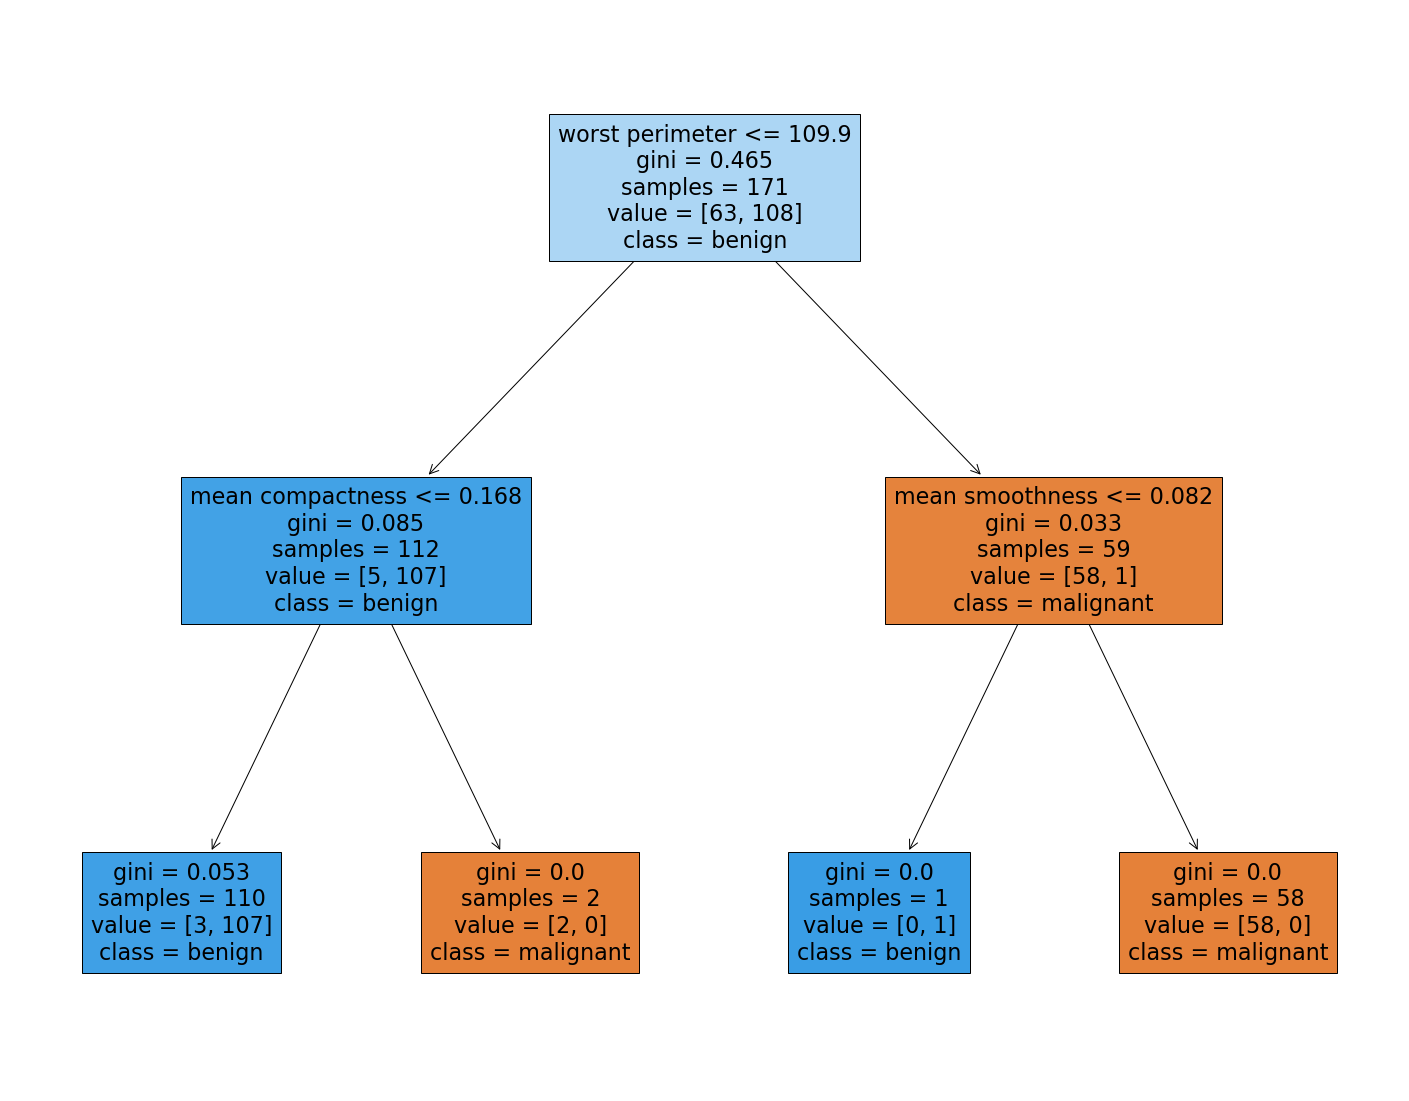

In [18]:
#resposta
tree_clf_test = DecisionTreeClassifier(max_depth=2, random_state=42)
model_test = tree_clf_test.fit(X_test, y_test)

fig = plt.figure(figsize=(25,20))
_   = tree.plot_tree(tree_clf_test, 
                   feature_names=data.feature_names,  
                   class_names=data.target_names,
                   filled=True)

## TODO 4

> Imprima a matriz de confusão (usando a Scikit-Learn)

> Obtenha a Acurácia, Precision, Recall e F1-Score

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


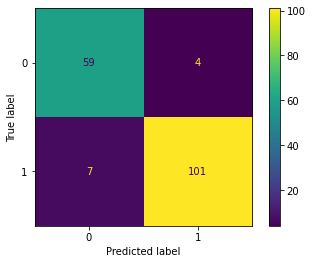

In [19]:
#resposta
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)

In [23]:
#resposta
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

y_pred = model.predict(X_test)

print('Accuracy: %.3f' % precision_score(y_test, y_pred))
print('Precision: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1-Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.962
Precision: 0.936
Recall: 0.935
F1-Score: 0.948


In [24]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

## TODO 5
> Treine o KNN nesse mesmo conjunto de  com diferentes valores de k variando de 5 a 15

> Armazene os valores de k e o valor respectivo da acurácia

> Como o melhor resultado do KNN se saiu em relação ao resultado da Árvore de Decisão?

In [28]:
#resposta
import numpy as np

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X,y)

pred = KNN.predict(X)

<AxesSubplot:>

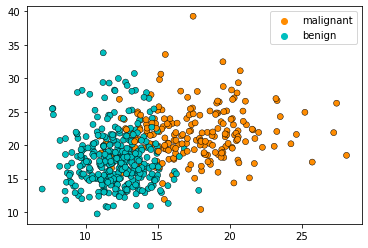

In [34]:
#resposta
import seaborn as sns

cmap_bold = ["darkorange", "c"]

sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=data.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
